# MATK Data Preprocessing

A meme consists of multiple elements that can be extract to improve comprehension:

1. Text Overlay 
2. Image Caption
3. Web Entities (Preprocessing Not Supported)
4. Image Features
5. Meme Cleaning (Inpainting)

To help with this, MATK provides the following preprocessing procedures.

## Getting Started

For this tutorial, we will be using the Harm-P dataset from https://github.com/LCS2-IIITD/MOMENTA

In [1]:
!pip install -r ../requirements.txt

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-3xfchl8t
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-3xfchl8t
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done
  Using cached Pillow-8.2.0-cp38-cp38-manylinux1_x86_64.whl.metadata (7.1 kB)
ERROR: Could not find a version that satisfies the requirement easyocr-1.7.1 (from versions: none)
ERROR: No matching distribution found for easyocr-1.7.1


## Text Overlay
The techniques to extract the text overlay are defined under `preprocessing/ocr-extraction`.

MATK features wrappers for the following state-of-the-art models:

1. **EasyOCR**: `easyocr.py`

In [4]:
!python ../preprocessing/text-extraction/easyocr-wrapper.py \
  --img_dir "/mnt/data1/datasets/memes/harmp/images/harmeme_images_us_pol" \
  --output_dir "/mnt/data1/datasets/memes/harmp/preprocessing/text-extraction/easyocr/harmeme_images_us_pol"

/home/mshee/anaconda3/envs/MATK-test/lib/python3.8/site-packages/transformers/utils/hub.py:124: FutureWarning: Using `PYTORCH_TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(
3552
Find 3552 images!
  0%|                                          | 1/3552 [00:00<31:35,  1.87it/s]/home/mshee/anaconda3/envs/MATK-test/lib/python3.8/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
100%|███████████████████████████████████████| 3552/3552 [04:35<00:00, 12.91it/s]


Viola! The text overlay on top of the meme should be extracted and stored inside the output directory.

Let's examine one of the example and see the accuracy of the optical character recognition technique.

In [27]:
import os
import json

# Loading OCR Text
meme_id = "memes_965"
ocr_dir = "/mnt/data1/datasets/memes/harmp/preprocessing/text-extraction/easyocr/harmeme_images_us_pol"
ocr_filepath = os.path.join(ocr_dir, f"{meme_id}.json")

with open(ocr_filepath) as f:
    ocr_data = json.load(f)

In [28]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Loading Image
img_dir = "/mnt/data1/datasets/memes/harmp/images/harmeme_images_us_pol"
image_path = os.path.join(img_dir, f"{meme_id}.png")
image = Image.open(image_path)

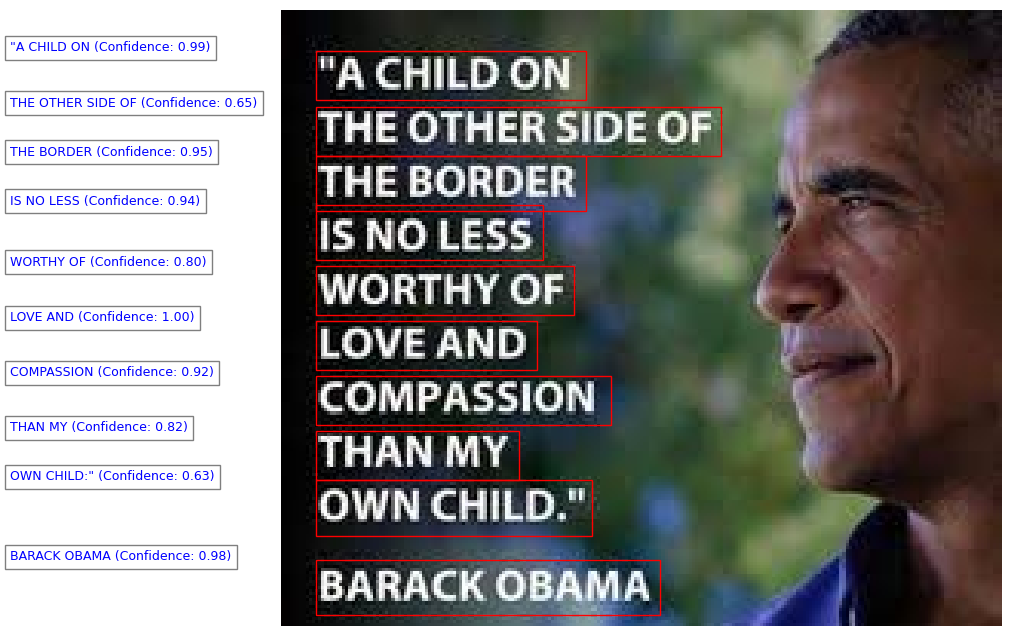

In [37]:
# Create figure and axes
fig, ax = plt.subplots(1, figsize=(12, 8))
ax.imshow(image)

# Draw rectangles and text
for box, text, confidence in ocr_data:
    # Calculate rectangle parameters
    x_min, y_min = box[0][0], box[0][1]
    width = box[1][0] - box[0][0]
    height = box[2][1] - box[1][1]
    
    # Create a rectangle patch
    rect = patches.Rectangle((x_min, y_min), width, height, linewidth=1, edgecolor='r', facecolor='none')
    
    # Add the rectangle to the Axes
    ax.add_patch(rect)
    
    # Add text annotation
    ax.text(x_min - 100, y_min, f"{text} (Confidence: {confidence:.2f})", fontsize=9, color='blue', bbox=dict(facecolor='white', alpha=0.5))


# Display the figure
plt.axis('off')  # Turn off axis
plt.show()

## Text Overlay
The techniques to clean the meme image are defined under `preprocessing/image-inpainting`.

MATK features wrappers for the following state-of-the-art models:

1. **EasyOCR**: `easyocr.py`

## Image Captioning

Image captioning procedures are defined under `preprocessing/image-captioning`. 
MATK features wrappers for performing image captioning with several state-of-the-art models:

1. **BLIP-2**: `blip2captioning.py`
2. **InstructBLIP**: `InstructBLIP-captioning.py`
3. **CLIP**: `clip-captioning.py`
4. **mPLUG**: `mPLUG-captioning.py`

In this tutorial, we will be using BLIP-2 as an example walk-through.

In [7]:
!python preprocessing/image-captioning/blip2-captioning.py --model-name Salesforce/blip2-opt-6.7b-coco --img-dir tutorial_data --output-dir tutorial_outputs/blip2captions --device cuda 

/home/aditi/anaconda3/lib/python3.11/site-packages/transformers/utils/hub.py:124: FutureWarning: Using `PYTORCH_TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(
2024-05-13 23:41:08.984816: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-13 23:41:08.984902: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-13 23:41:08.985836: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-13 23:41:08.990527: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CP

#### Let's examine some of the images and captions.

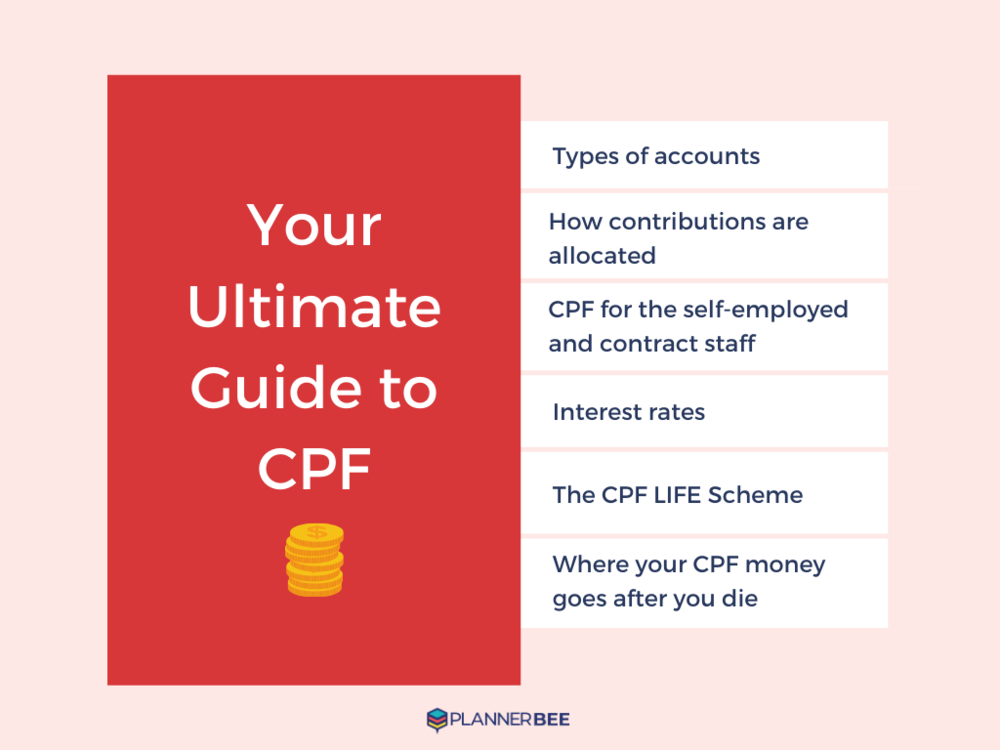

a poster with the words, your ultimate guide to cpp


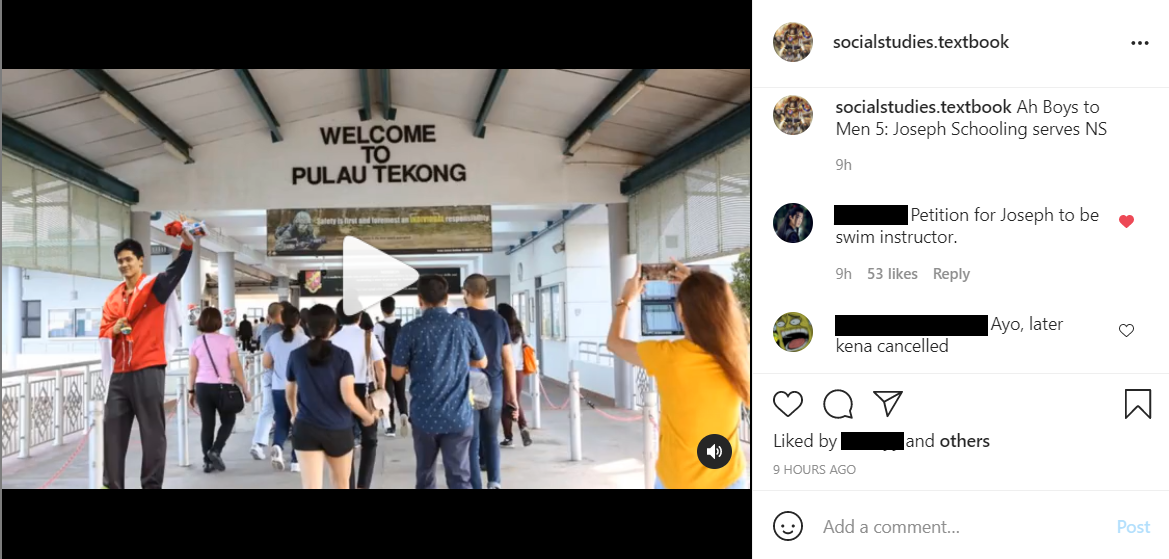

a video of a group of people standing in front of a building


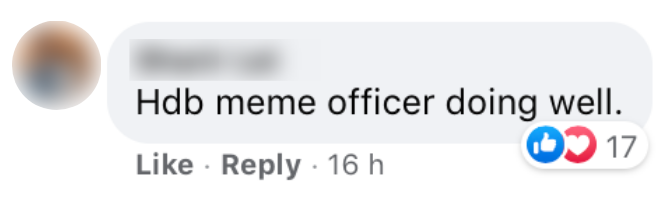

a text message with a picture of a person and a message


In [25]:
from IPython.display import display, Image

import json
def read_json_file(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

display(Image(filename="tutorial_data/img_001.jpg", width=400, height=400))
caption_data = read_json_file('tutorial_outputs/blip2captions/blip2-opt-6.7b-coco/img_001.json')
print(caption_data['caption'])

display(Image(filename='tutorial_data/img_002.jpg', width=400, height=400))
caption_data = read_json_file('tutorial_outputs/blip2captions/blip2-opt-6.7b-coco/img_002.json')
print(caption_data['caption'])

display(Image(filename='tutorial_data/img_003.jpg', width=400, height=400))
caption_data = read_json_file('tutorial_outputs/blip2captions/blip2-opt-6.7b-coco/img_003.json')
print(caption_data['caption'])

We see that the BLIP2 generates short and relevant captions for the meme images. Users can also explore 

## Image Feature Extraction

Image feature extraction procedures are defined under `preprocessing/image-extraction/image_extraction`.

MATK supports the use of image features in addition to the use of just images for fine-tuning and evaluation. Thus, MATK features wrappers for performing image feature extraction with state-of-the-art models like:

1. **CLIP**: `clip.py`
2. **Faster-RCNN**: `frcnn.py`

In this tutorial, we will use Faster-RCNN features as an example walkthrough.
hrough.
n.py`

In [12]:
!CUDA_VISIBLE_DEVICES=0 python preprocessing/image-extraction/image_extraction/frcnn.py --frcnn_class_or_path unc-nlp/frcnn-vg-finetuned --device cuda --image-dir tutorial_data --feature-dir tutorial_outputs/frcnn_features --overwrite True

/home/aditi/anaconda3/lib/python3.11/site-packages/transformers/utils/hub.py:124: FutureWarning: Using `PYTORCH_TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(
%s not found in cache or force_download set to True, downloading to %s https://s3.amazonaws.com/models.huggingface.co/bert/unc-nlp/frcnn-vg-finetuned/config.yaml /mnt/data2/.cache/huggingface/hub/tmprr_zwyl8
Downloading: 100%|█████████████████████████| 2.13k/2.13k [00:00<00:00, 8.39MB/s]
loading configuration file cache
%s not found in cache or force_download set to True, downloading to %s https://cdn.huggingface.co/unc-nlp/frcnn-vg-finetuned/pytorch_model.bin /mnt/data2/.cache/huggingface/hub/tmpv_9oyxpn
Downloading: 100%|████████████████████████████| 262M/262M [00:02<00:00, 117MB/s]
loading weights file https://cdn.huggingface.co/unc-nlp/frcnn-vg-finetuned/pytorch_model.bin from cache at /mnt/data2/.cache/huggingface/hub/57f6df6abe353be2773f2700159c65615babf3

#### Let's examine the structure of the generated features

In [26]:
import pickle

with open('tutorial_outputs/frcnn_features/unc-nlp/frcnn-vg-finetuned/img_001.pkl', 'rb') as f:
    features = pickle.load(f)

In [28]:
print(features.keys())

odict_keys(['obj_ids', 'obj_probs', 'attr_ids', 'attr_probs', 'boxes', 'sizes', 'preds_per_image', 'roi_features', 'normalized_boxes'])


We're interested in the `roi_features` data as this contains the Faster-RCNN features.